In [2]:
# Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [3]:
raw_data = pd.read_csv("train.csv")

In [4]:
raw_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,160831,34,Male,NaN,26,none,17.0,Basic,Quarterly,890.21,30.0,active,06-21,07-08,0
1,354435,30,Male,36.0,22,NaN,15.0,Basic,Annual,954.37,30.0,active,06-10,06-25,0
2,444576,23,Male,44.0,14,none,NaN,Premium,Annual,674.00,21.0,inactive,06-27,07-21,1
3,130847,24,Male,39.0,21,2,14.0,Standard,Quarterly,775.00,18.0,active,06-30,07-14,0
4,108121,26,Male,NaN,26,1,5.0,Basic,Quarterly,679.45,NaN,active,06-29,07-04,0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303124 entries, 0 to 303123
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         303124 non-null  int64  
 1   Age                303124 non-null  int64  
 2   Gender             303124 non-null  object 
 3   Tenure             241103 non-null  float64
 4   Usage Frequency    303124 non-null  int64  
 5   Support Calls      240704 non-null  object 
 6   Payment Delay      214800 non-null  float64
 7   Subscription Type  303124 non-null  object 
 8   Contract Length    303124 non-null  object 
 9   Total Spend        303124 non-null  float64
 10  Last Interaction   240574 non-null  float64
 11  Customer Status    303124 non-null  object 
 12  Last Due Date      303124 non-null  object 
 13  Last Payment Date  303124 non-null  object 
 14  Churn              303124 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 34

In [6]:
raw_data.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
Tenure               62021
Usage Frequency          0
Support Calls        62420
Payment Delay        88324
Subscription Type        0
Contract Length          0
Total Spend              0
Last Interaction     62550
Customer Status          0
Last Due Date            0
Last Payment Date        0
Churn                    0
dtype: int64

In [7]:
#raw_data['Support Calls'].replace({"none":0})
#raw_data['Support Calls'].value_counts()

In [8]:
clean_data = raw_data.dropna(axis=1, how='any')

In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303124 entries, 0 to 303123
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         303124 non-null  int64  
 1   Age                303124 non-null  int64  
 2   Gender             303124 non-null  object 
 3   Usage Frequency    303124 non-null  int64  
 4   Subscription Type  303124 non-null  object 
 5   Contract Length    303124 non-null  object 
 6   Total Spend        303124 non-null  float64
 7   Customer Status    303124 non-null  object 
 8   Last Due Date      303124 non-null  object 
 9   Last Payment Date  303124 non-null  object 
 10  Churn              303124 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 25.4+ MB


In [10]:
train_set = clean_data.sample(frac=0.8, random_state=42)

test_set = clean_data.drop(train_set.index)

In [11]:
X_train = train_set[['Age','Total Spend']]
y_train = train_set['Churn']

In [12]:
X_test = test_set[['Age','Total Spend']]
y_test = test_set['Churn']

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
y_pred_knn = knn.predict(X_test)

In [15]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

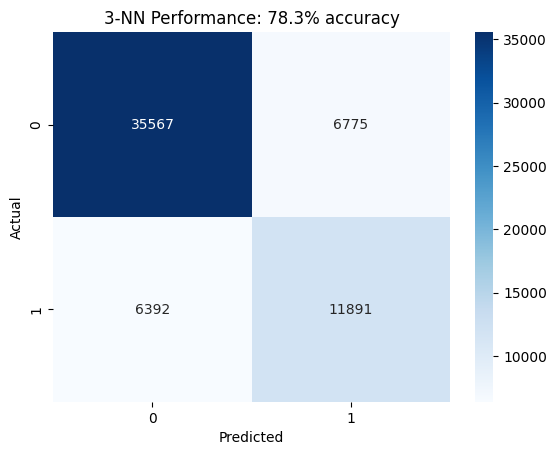

In [16]:
acc = round(100*accuracy_score(y_test, y_pred_knn),1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'3-NN Performance: {acc}% accuracy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
y_prob_knn = knn.predict_proba(X_test)

In [18]:
testing_data = pd.read_csv("test.csv")

In [19]:
X_testing = testing_data[['Age','Total Spend']]

In [20]:
y_prob_knn_testing = knn.predict_proba(X_testing)

In [21]:
to_submit = pd.DataFrame(y_prob_knn_testing)

In [22]:
to_id = testing_data['CustomerID']

In [23]:
to_submit = to_submit.drop([0],axis=1)

In [24]:
to_submit['Churn'] = to_submit[1]

In [25]:
to_submit = to_submit.drop([1],axis=1)

In [26]:
to_id = to_id.to_frame()

In [27]:
to_submit

,Churn
0,1.000000
1,0.333333
2,0.333333
3,1.000000
4,1.000000
...,...
133771,0.333333
133772,0.333333
133773,0.333333
133774,0.333333


In [28]:
submission = to_id.merge(to_submit, right_index=True, left_index=True)

In [29]:
submission.to_csv("HM_Submission1.csv", index=False)

In [30]:
submission

,CustomerID,Churn
0,262106,1.000000
1,37061,0.333333
2,361832,0.333333
3,425516,1.000000
4,60597,1.000000
...,...,...
133771,396573,0.333333
133772,452602,0.333333
133773,424958,0.333333
133774,242104,0.333333
